###Yahoo Finance 
Tutorial on how to get current/historical prices from yahoo finance using yahoo_finace

Import yahoo finance and other necessary packages

In [54]:
from yahoo_finance import Share
import numpy as np


First we need to create an instance of Share. Using that instance we will get prices, volumes, ratios and all other company information

In [55]:
#for this Example I will use google's finances

#create an instance of Share
google = Share('GOOG')

Price Information

In [56]:
#now that an instance of Share is created (google), we will call its functions to get the prices

#date and time of the trade
date = google.get_trade_datetime()

#opening price
opening_price = google.get_open()

#Price right now (Yahoo finance is delayed by 15 mins)
current_price = google.get_price()

#Day's high and low prices 
day_high = google.get_days_high()
day_low = google.get_days_low()

#price changes from opening price
price_change = google.get_change()

print "trading date: ", date
print "current price: ", current_price
print "opening price: $" , opening_price
print "day high: $", day_high
print "day low: $", day_low
print "print price change: $", price_change
#Refresh to get a new price
# Note that after the market closes @ 4PM EST, the price will stay the same
google.refresh()

date = google.get_trade_datetime()
current_price = google.get_price()
price_change = google.get_change()

print "\n########## After refreshing ####################"
print "trading date: ", date
print "current price: ", current_price
print "opening price: $" , opening_price
print "print price change: $", price_change

trading date:  2015-09-08 20:00:00 UTC+0000
current price:  614.66
opening price: $ 612.99
day high: $ 616.31
day low: $ 604.12
print price change: $ +13.96

########## After refreshing ####################
trading date:  2015-09-08 20:00:00 UTC+0000
current price:  614.66
opening price: $ 612.99
print price change: $ +13.96


Moving averages. Get a peek of what prices have been like in the past. 


In [57]:
#If current prices are higher than 50 or 200 days moving average, that means prices are going up

#200 days moving average
th_moving_avg = google.get_200day_moving_avg()

#50 days moving average
fifty_moving_avg = google.get_50day_moving_avg()

print "200 days moving average: $", th_moving_avg
print "50 days moving average: $", fifty_moving_avg

200 days moving average: $ 566.25
50 days moving average: $ 632.71


Volume Information

In [58]:
#Volume speaks (If more people are trading, there's gotta be something good or bad happening)

volume = google.get_volume()
#compare this days volume with average volume
average_daily_volume = google.get_avg_daily_volume()

print "Today's volume: ", volume
print "Average volume: ", average_daily_volume

Today's volume:  2279538
Average volume:  2405180


Ratios are important for technical analysis. Price to Earning ratio is the most important of them all. Value investors like Warren Buffet use this to their analysis.

In [59]:
#PE ratio ---> price per share divided by earnings per share
#Lower PE the better 
PE = google.get_price_earnings_ratio()

#PEG ratio ---> pe ratio divided by 1-reinvestment (growth)
PEG = google.get_price_earnings_growth_ratio()

print "Price to earning (PE) ratio : ", PE
print "Price earning to growth (PEG) ratio: ", PEG

Price to earning (PE) ratio :  28.96
Price earning to growth (PEG) ratio:  1.14


Book Value

In [60]:
#book value -> what the numbers say this company is worth
print "book value",  google.get_book_value()

book value 163.07


Dividends: how is the company paying its investors

In [61]:
div_per_share = google.get_dividend_share()
div_yield = google.get_dividend_yield()

#for some reason Google's dividend information was not available
print "dividend per share: $", div_per_share
print "divident yield: ", div_yield

dividend per share: $ None
divident yield:  None


Historical Prices

*Data not available for Saturday/Sunday


In [62]:
historical = google.get_historical('2015-07-28', '2015-09-08')
print "First day: \n", historical[0]
print "last day: \n", historical[-1]

First day: 
{'Volume': '2270800', 'Symbol': 'GOOG', 'Adj_Close': '614.659973', 'High': '616.309998', 'Low': '604.119995', 'Date': '2015-09-08', 'Close': '614.659973', 'Open': '612.48999'}
last day: 
{'Volume': '1704300', 'Symbol': 'GOOG', 'Adj_Close': '628.00', 'High': '632.830017', 'Low': '623.309998', 'Date': '2015-07-28', 'Close': '628.00', 'Open': '632.830017'}


In [63]:
print len(historical)
#To get the closing price for first day
print historical[0]['Close']

#opening price for first day
print historical[0]['Open']


30
614.659973
612.48999


More on historical prices coming soon

In [65]:
#to get all opening prices together

opening = [] #is a dynamic array (list) for python

for i in range(len(historical)):
    x = historical[i]['Open']
    opening.append(x)

closing = [] #is a dynamic array (list) for python

for i in range(len(historical)):
    x = historical[i]['Close']
    closing.append(x)

x_axis = np.arange(0+1, len(historical)+1)


In [1]:
#print opening
#print closing
#print x_axis

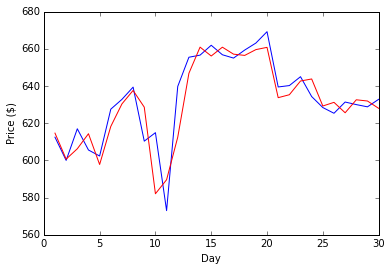

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_axis,opening, 'b', x_axis, closing, 'r')
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.show()

